In [1]:
# Imported all the needed libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
! pip install plotly kaledio

ERROR: Could not find a version that satisfies the requirement kaledio (from versions: none)
ERROR: No matching distribution found for kaledio


In [3]:
df=pd.read_csv("Health_insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


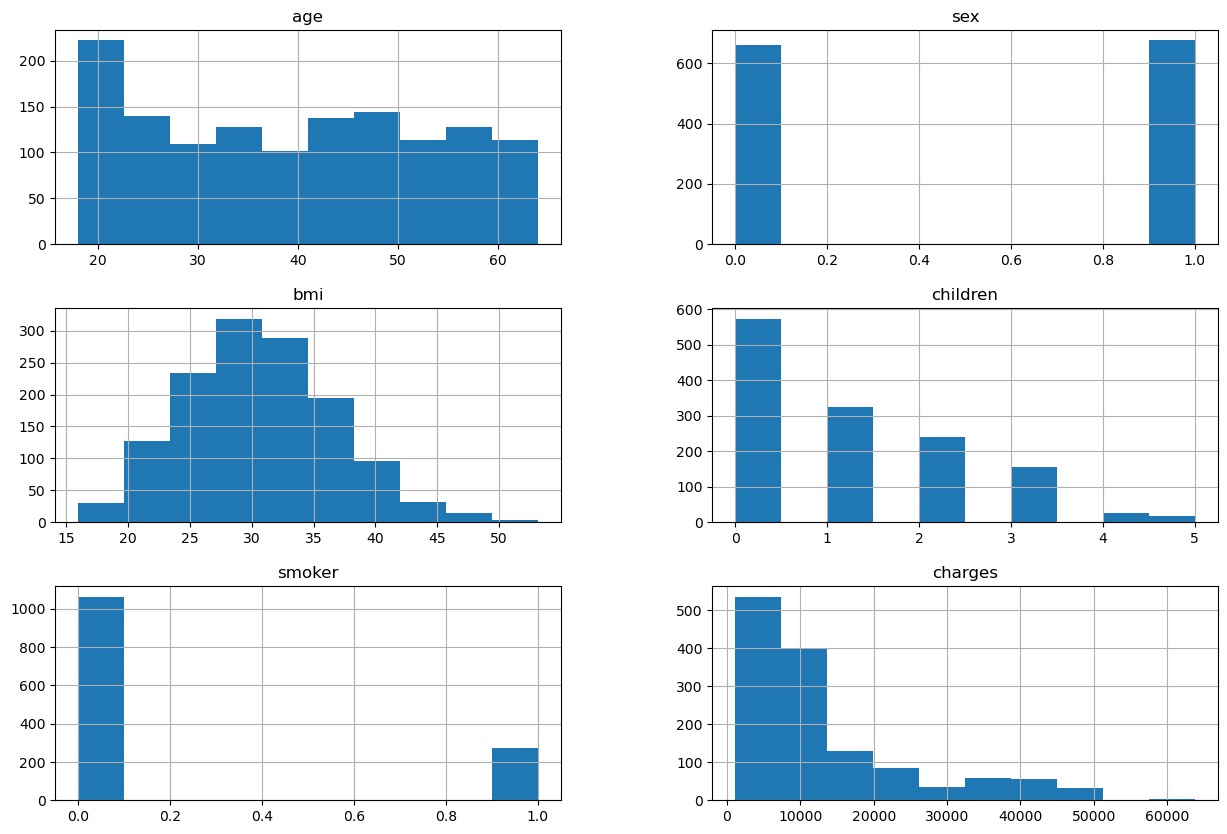

In [26]:
df.hist(figsize=(15,10))
plt.savefig("Density distribution.")


In [8]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1320\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_1320\382192054.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


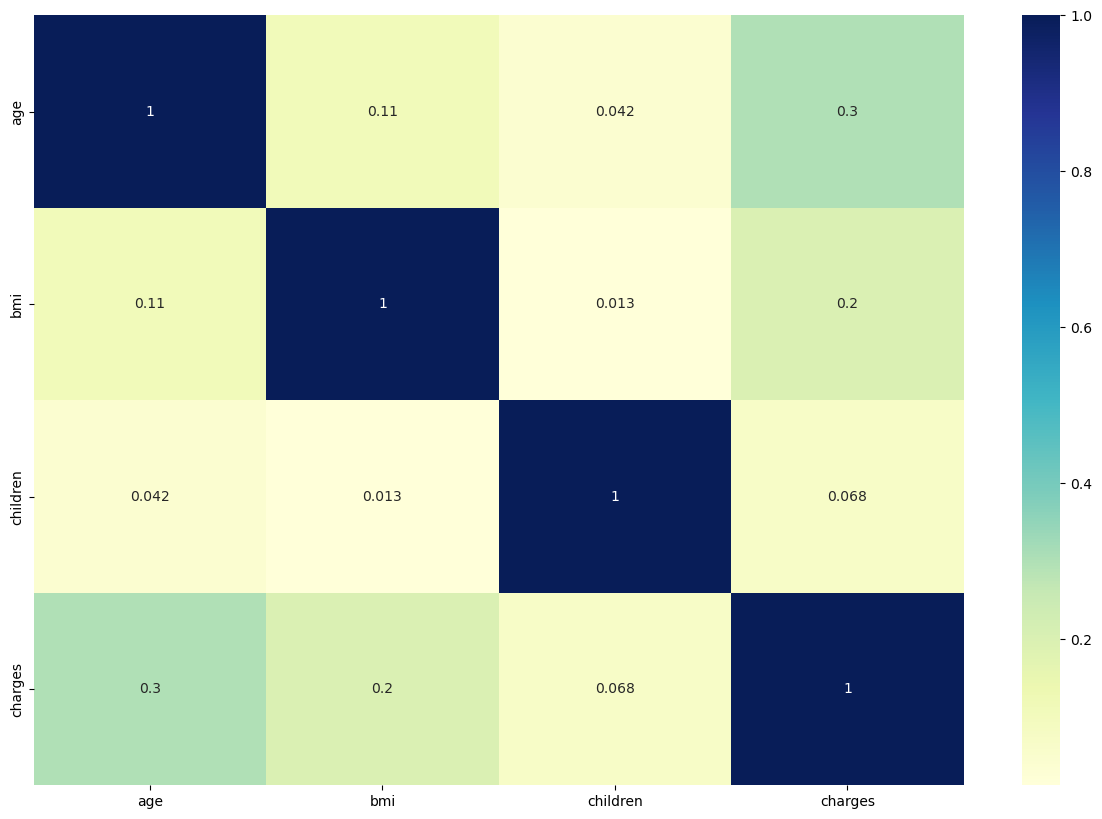

In [9]:

# The correlation matrix helps us map input features of the data.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

plt.savefig("Features_correlation")



In [10]:
fig=px.histogram(df,x="sex",color="smoker",title="Count of smokers by sex")
fig.update_layout(height=800,width=1000)

# Evaluating smokers by age

In [11]:
#Encoding categorical variables to continious variable.
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"no":0,"yes":1})

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [13]:
pie=df["region"].value_counts()
regions=pie.index
pop=pie.values

fig=px.pie(df,values=pop,names=regions)
fig.update_layout(height=800,width=1000)
fig.show()

In [14]:
df.drop(["region"],axis=1,inplace=True)

In [15]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



Mean squared error: 29915447.274644293


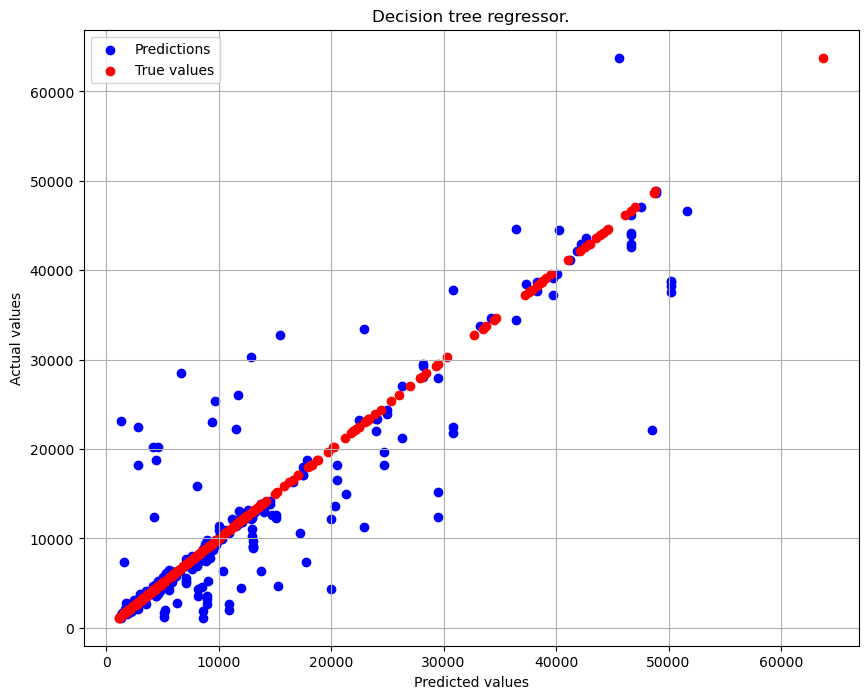

In [29]:
# Split the data into training and testing.
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

# Implementing the decision tree regressor model.
dtree=DecisionTreeRegressor(max_depth=None,max_features="auto",min_samples_leaf=3,random_state=42)

dtree.fit(x_train,y_train)

y_pred=dtree.predict(x_test)

mse=mean_squared_error(y_pred,y_test)

print("Mean squared error:",mse)
plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color="blue",label="Predictions")
plt.scatter(y_test,y_test,color="red",label="True values")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Decision tree regressor.")
plt.legend()
plt.grid()
plt.savefig("Decision tree actual vs predicted")
plt.show()

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Mean squared error: 21429941.51326517


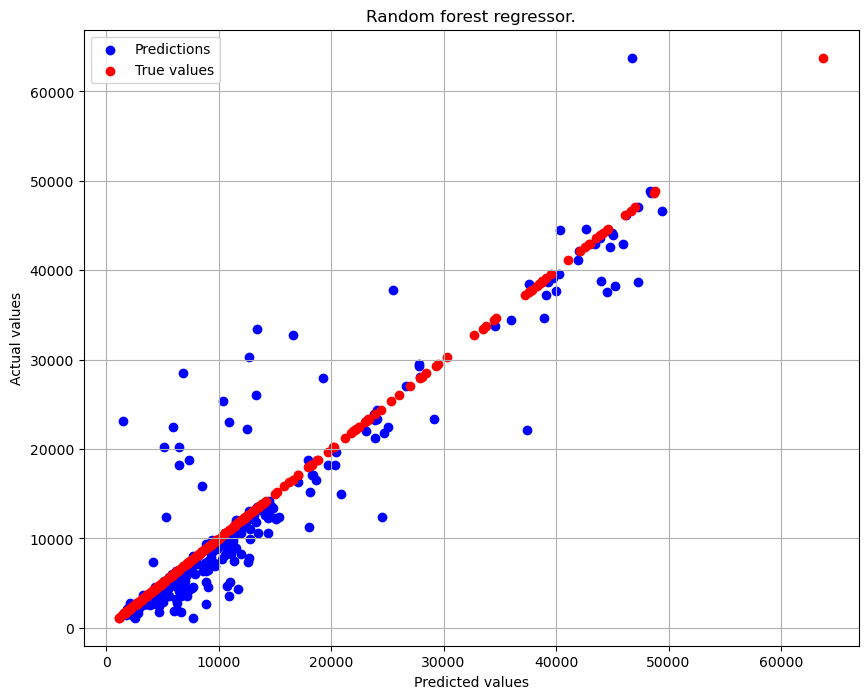

In [30]:
rforest=RandomForestRegressor(n_estimators=100,max_depth=None,max_features="auto",min_samples_split=5,random_state=42)

rforest.fit(x_train,y_train)
y_pred=rforest.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print("Mean squared error:",mse)

plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color="blue",label="Predictions")
plt.scatter(y_test,y_test,color="red",label="True values")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Random forest regressor.")
plt.legend()
plt.grid()
plt.savefig("Random forest model actual vs predicted")
plt.show()

In [18]:
param_dist={
    "n_estimators":[100,150,200],
    "max_depth":[None,10,15,20],
    "max_features":[2,6,8],
    "min_samples_split":[2,5,7]
    
}

model=RandomForestRegressor(random_state=42)

grid_search=GridSearchCV(estimator=model,param_grid=param_dist,cv=5,scoring="neg_mean_squared_error")

grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

In [19]:
best_params

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 7,
 'n_estimators': 200}

In [20]:
best_estimator

RandomForestRegressor(max_depth=10, max_features=2, min_samples_split=7,
                      n_estimators=200, random_state=42)

In [21]:
# Refitting the model with the best estimator:

best_estimator.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=2, min_samples_split=7,
                      n_estimators=200, random_state=42)

In [25]:
test_score=best_estimator.score(x_test,y_test)
test_score

0.8723754217763897

In [23]:
print("Best parameters:",best_params)
print("Test score(R^2):",test_score)

Best parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 7, 'n_estimators': 200}
Test score(R^2): 0.8723754217763897


Model performance is at around 87%